# 迷路

In [63]:
%matplotlib inline
import pylab as pl
import numpy as np
import igraph
import io
from IPython.display import display_png

In [65]:
def show_image(img):
    f = io.BytesIO()
    pl.imsave(f, img, format="png")
    display_png(f.getvalue(), raw=True)

In [73]:
img = pl.imread("data/maze.png")
sx, sy = (402, 986)
ex, ey = (398,  25)
bimg = np.all(img > 0.81, axis=2)
H, W = bimg.shape

x0, x1 = np.where(bimg[H//2, :]==0)[0][[0, -1]]
bimg[H//2, :x0] = 0
bimg[H//2, x1:] = 0

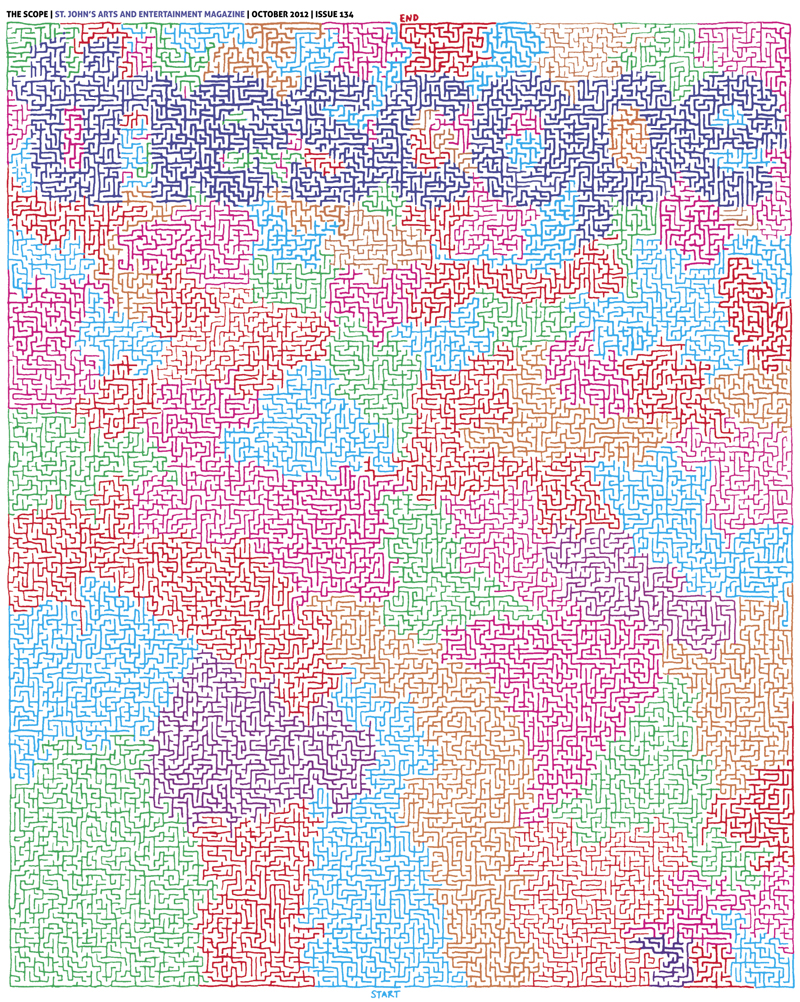

In [74]:
show_image(img)

In [75]:
mask = (bimg[1:, :] & bimg[:-1, :]) 
idx = np.where(mask.ravel())[0]
vedge = np.c_[idx, idx + W]

mask = (bimg[:, 1:] & bimg[:, :-1])
y, x = np.where(mask)
idx = y * W + x
hedge = np.c_[idx, idx + 1]

edges = np.vstack([vedge, hedge])

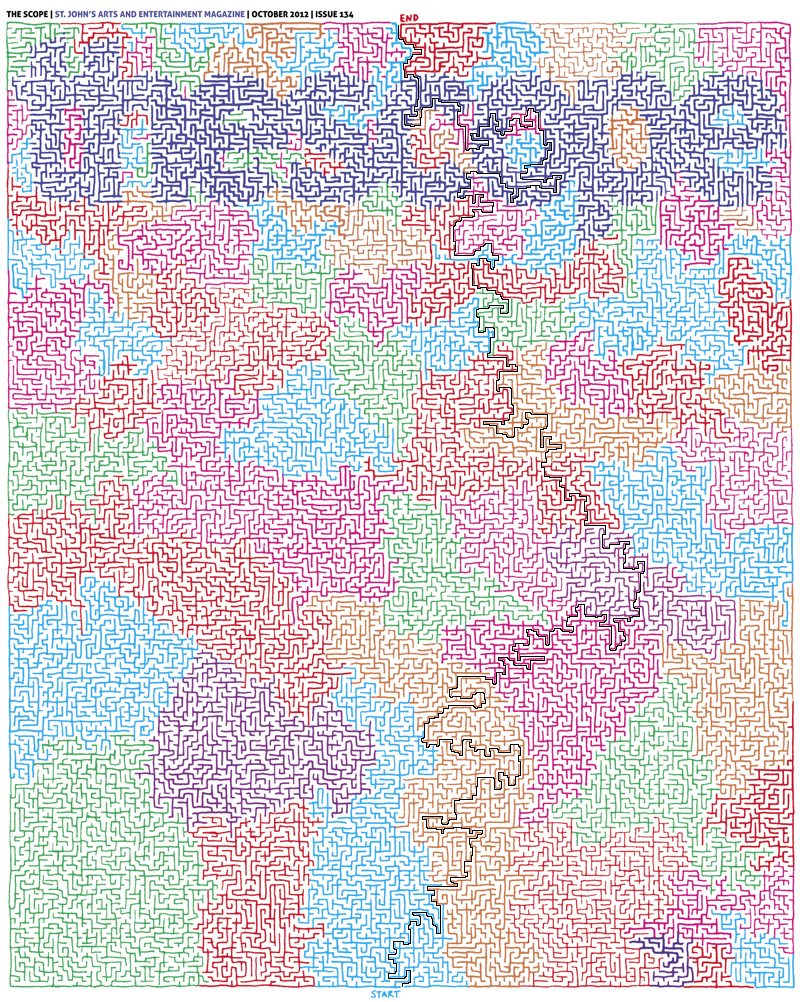

In [76]:
g = igraph.Graph()
g.add_vertices(np.product(bimg.shape))
g.add_edges(edges)

startid = sy * W + sx
endid   = ey * W + ex

shortest_path = np.array(g.get_shortest_paths(startid, endid, mode=igraph.OUT))
path_x, path_y = shortest_path % W, shortest_path // W
img_res = img.copy()
img_res[path_y, path_x, :] = 0

show_image(img_res)